In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Number of nodes: 15


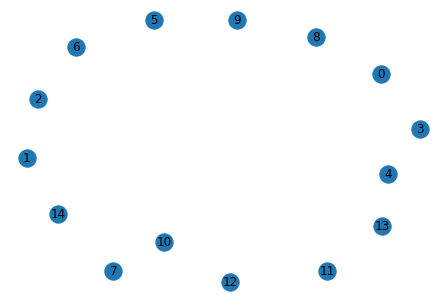

In [2]:
G=nx.Graph()
G.add_nodes_from(range(0,15))
#print(G.nodes)
n_nodes = len(G)
print("Number of nodes:", n_nodes)
nx.draw(G, with_labels=True)

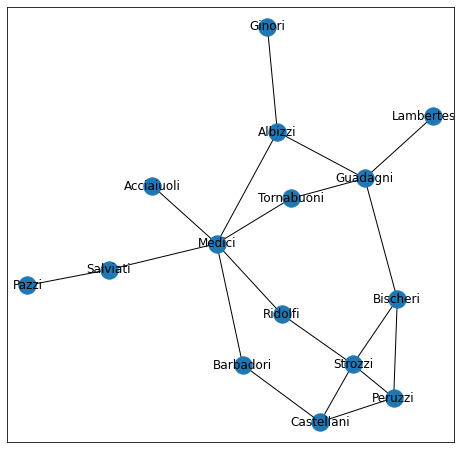

In [3]:
mapping = {0:"Lamberteschi",1:"Peruzzi",2:"Bischeri",3:"Guadagni",4:"Castellani",5:"Strozzi",
           6:"Tornabuoni",7:"Ridolfi",8:"Albizzi",9:"Ginori",10:"Barbadori",11:"Medici",12:"Acciaiuoli",
          13:"Salviati",14:"Pazzi"}
H=nx.relabel_nodes(G,mapping)
H.add_edge(("Lamberteschi"),("Guadagni"))
H.add_edge(("Bischeri"),("Guadagni"))
H.add_edge(("Tornabuoni"),("Guadagni"))
H.add_edge(("Albizzi"),("Guadagni"))
H.add_edge(("Bischeri"),("Strozzi"))
H.add_edge(("Bischeri"),("Peruzzi"))
H.add_edge(("Peruzzi"),("Strozzi"))
H.add_edge(("Peruzzi"),("Castellani"))
H.add_edge(("Strozzi"),("Castellani"))
H.add_edge(("Strozzi"),("Ridolfi"))
H.add_edge(("Castellani"),("Barbadori"))
H.add_edge(("Tornabuoni"),("Medici"))
H.add_edge(("Ridolfi"),("Medici"))
H.add_edge(("Albizzi"),("Medici"))
H.add_edge(("Albizzi"),("Ginori"))
H.add_edge(("Barbadori"),("Medici"))
H.add_edge(("Medici"),("Acciaiuoli"))
H.add_edge(("Medici"),("Salviati"))
H.add_edge(("Salviati"),("Pazzi"))
fig = plt.figure(figsize=(8,8))
nx.draw_networkx(H)
plt.savefig("Families.png")
#plt.show(H)

In [4]:
indices = dict()
for i in range(n_nodes):
    indices[list(H.nodes)[i]] = i
print(indices)

{'Lamberteschi': 0, 'Peruzzi': 1, 'Bischeri': 2, 'Guadagni': 3, 'Castellani': 4, 'Strozzi': 5, 'Tornabuoni': 6, 'Ridolfi': 7, 'Albizzi': 8, 'Ginori': 9, 'Barbadori': 10, 'Medici': 11, 'Acciaiuoli': 12, 'Salviati': 13, 'Pazzi': 14}


In [5]:
# Number of iterations
n_iter = 50;
    
# Stubborn and regular nodes
stubborn = [("Medici"), ("Strozzi")];
stubborn_id = [indices.get(key) for key in stubborn]
regular = [node for node in H.nodes if node not in stubborn]
regular_id = [id for id in range(n_nodes) if id not in stubborn_id]
print("Stubborn nodes:", stubborn)
print("Regular nodes:", regular)

# Input to stubborn nodes
u = [1,-1]


# P matrix
A = nx.adjacency_matrix(H) # -> return type is scipy.sparse.csr_matrix
A = A.toarray() # convert A to a numpy array
degrees = np.sum(A,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ A

# Submatrices
# Using ix_ one can construct index arrays that will 
# index a cross product. 
# a[np.ix_([1,3],[2,5])] returns the array [[a[1,2] a[1,5]], [a[3,2] a[3,5]]].
Q = P[np.ix_(regular_id, regular_id)]
E = P[np.ix_(regular_id, stubborn_id)]

# Sample a random initial condition for regular nodes
ic = np.random.uniform(1,-1,len(regular))
#ic=np.zeros(len(regular))
#print(ic)

# Set the initial condition for the dynamics
x = np.zeros((n_nodes,n_iter))
x[stubborn_id,0] = u;
x[regular_id,0] = ic;
print("Initial condition:", x[:,0])

# Evolve the opinion vector
for t in range(1,n_iter):
    x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
    x[stubborn_id, t] = x[stubborn_id, t-1];

x_final = x[:,n_iter-1]
equilibrium=[]
for key in indices.keys():
    equilibrium.append(x_final[indices[key]])

print(equilibrium)




Stubborn nodes: ['Medici', 'Strozzi']
Regular nodes: ['Lamberteschi', 'Peruzzi', 'Bischeri', 'Guadagni', 'Castellani', 'Tornabuoni', 'Ridolfi', 'Albizzi', 'Ginori', 'Barbadori', 'Acciaiuoli', 'Salviati', 'Pazzi']
Initial condition: [ 0.14653107 -0.88593397 -0.93872172  0.16156285  0.84619052 -1.
  0.16000695  0.12777247  0.02293588  0.75321683 -0.82898188  1.
 -0.83502369 -0.2492146   0.20678124]
[0.2727223329469549, -0.6363673430689083, -0.45454756785220873, 0.27271419521922896, -0.4545460814135318, -1.0, 0.6363611664734774, 0.0, 0.6363602693243495, 0.636349972301567, 0.2727260007589806, 1.0, 1.0, 0.9999999763602386, 0.9999999255410078]


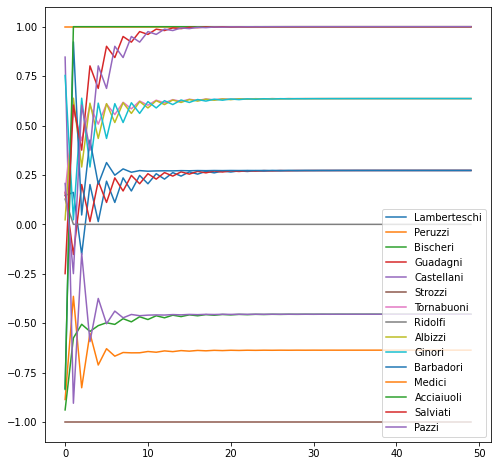

In [6]:
import matplotlib.pyplot as plt
families=[]
for key in mapping:
    families.append(mapping[key])   
#print(families)
fig = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)

for i in enumerate(families):
    trajectory = x[i[0],:]
    #print(i)
    ax.plot(trajectory,label=i[1])
    
ax.legend()
plt.savefig("Trajectories.png")

In [7]:
nx.algorithms.link_analysis.pagerank_alg.pagerank(H,0.85)

{'Lamberteschi': 0.03202380862614049,
 'Peruzzi': 0.07018669768905662,
 'Bischeri': 0.07152768304944948,
 'Guadagni': 0.10363968342248671,
 'Castellani': 0.07165770456948056,
 'Strozzi': 0.09231779767919304,
 'Tornabuoni': 0.053847957717114925,
 'Ridolfi': 0.051441782879237674,
 'Albizzi': 0.08212695905832179,
 'Ginori': 0.03326886799001193,
 'Barbadori': 0.05212720844546092,
 'Medici': 0.1540500134086529,
 'Acciaiuoli': 0.03182414909097444,
 'Salviati': 0.06312994200096989,
 'Pazzi': 0.036829744373448464}

In [8]:
iterations=100
beta=0.15
u=np.ones(n_nodes)
lamda= beta * u/sum(u)
y=np.zeros((n_nodes,iterations))
y[:,0]=np.random.uniform(-1,1,n_nodes)
Q=(1-beta)*P
qt=np.transpose(Q)

for t in range(1,iterations):
    y[:,t]=qt@y[:,t-1]+lamda

y_final=y[:,iterations-1]


In [9]:
centralities={}
for key in indices.keys():
    centralities[key]=y_final[indices[key]]
    
sorted(centralities.items(), key = lambda item: -item[1])

[('Medici', 0.15405127518460057),
 ('Guadagni', 0.10364048029557453),
 ('Strozzi', 0.09231802134247742),
 ('Albizzi', 0.08212628021585834),
 ('Castellani', 0.07165778012561229),
 ('Bischeri', 0.07152742042669989),
 ('Peruzzi', 0.07018672082025117),
 ('Salviati', 0.06312944322525),
 ('Tornabuoni', 0.053847533672888324),
 ('Barbadori', 0.052126969225449356),
 ('Ridolfi', 0.05144151107379814),
 ('Pazzi', 0.03683001362366618),
 ('Ginori', 0.033269112992243374),
 ('Lamberteschi', 0.03202360253949346),
 ('Acciaiuoli', 0.03182393113339486)]

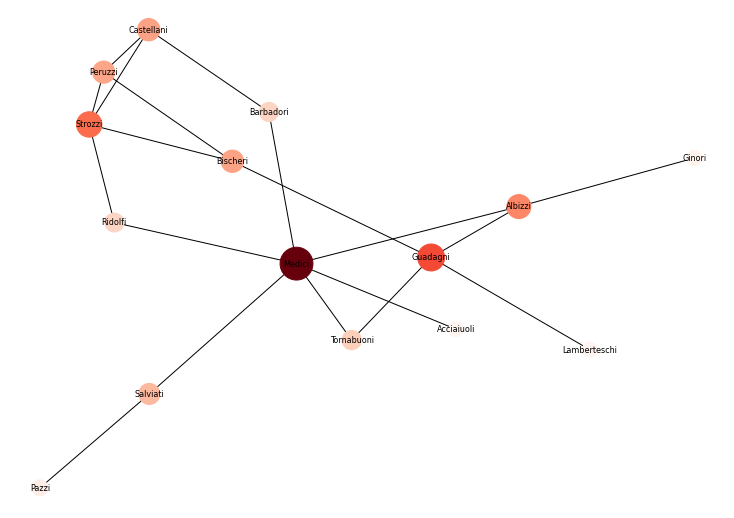

In [10]:
#Centralities è il dizionario contenente famiglia e relativo valore di centralità
pos = nx.spring_layout(H) 
plt.figure(1, figsize=(10,7))
nx.draw(H, pos,
          with_labels=True,
          nodelist=centralities.keys(),
          # node size is proportional to eigenvector centrality
          node_size = [d*7000 for d in centralities.values()],  
          node_color=list(centralities.values()),
          font_size=8,
          cmap=plt.cm.Reds,
          )